<a href="https://colab.research.google.com/github/Swaraj-sj2000/Machine-leaning-projects/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten,Dense,Reshape,Conv2D,Conv2DTranspose

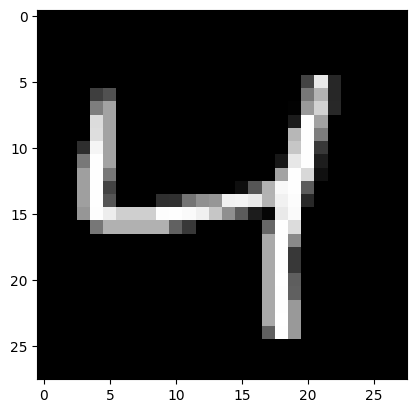

In [76]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()
plt.imshow(X_train[np.random.choice(10)],cmap='gray')

In [77]:
X_train[0].shape

(28, 28)

In [78]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [79]:
X_train=X_train/255
X_test=X_test/255

In [80]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Linear autoencoder

In [81]:
# Encoder
encoderL = keras.models.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64,activation='relu'),
    Dense(12,activation='relu'),
    Dense(3,name='encoder_out')])

# Decoder
decoderL = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
        Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(28*28, activation='sigmoid'),
    Reshape((28, 28, 1))])

# Autoencoder
autoencoderL = keras.models.Sequential([encoderL,decoderL])

#display model summaries
encoderL.summary()
decoderL.summary()
autoencoderL.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               100480    
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 12)                780       
                                                                 
 encoder_out (Dense)         (None, 3)                 39        
                                                                 
Total params: 109555 (427.95 KB)
Trainable params: 109555 (427.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "seque

In [82]:
print("Linear auto encoder training")
autoencoderL.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='mse')
autoencoderL.fit(X_train,X_train,epochs=10,batch_size=32,validation_split=0.1)


Linear auto encoder training
Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0755 - val_loss: 0.0638
Epoch 2/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0577 - val_loss: 0.0526
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0511 - val_loss: 0.0492
Epoch 4/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0477 - val_loss: 0.0459
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0451 - val_loss: 0.0438
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0437 - val_loss: 0.0427
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0428 - val_loss: 0.0420
Epoch 8/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0421 - val_loss: 0.0413
Epoch 9/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0415 - val_loss: 0.0408
Epoch 10/10
1688/1688 [====================

In [83]:
index=np.random.choice(len(X_test)) #generate a random choice to be displayed

exampleL=encoderL.predict([X_test[index].reshape(1,28,28,1)])[0]
print(exampleL)
print("Shape of 'exampleL':", exampleL.shape)



1/1 [==============================] - 0s 63ms/step
[8.863312  2.8877268 3.84519  ]
Shape of 'exampleL': (3,)


1/1 [==============================] - 0s 81ms/step


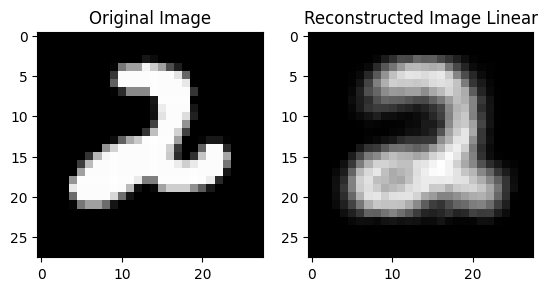

In [84]:
decoded_exampleL = decoderL.predict(np.array([exampleL])).reshape(28, 28)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(X_test[index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image Linear')
plt.imshow(decoded_exampleL, cmap='gray')

plt.show()


Convolution Autoencoder

In [85]:
# Encoder
encoderC = keras.models.Sequential([
    Conv2D(16, (3, 3), strides=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), strides=2, padding='same', activation='relu'),
    Conv2D(64, (7, 7), padding='valid', activation='relu')
])

# Decoder
decoderC = keras.models.Sequential([
    Conv2DTranspose(32, (7, 7), padding='valid', activation='relu'),
    Conv2DTranspose(16, (3, 3), strides=2, padding='same', output_padding=1, activation='relu'),
    Conv2DTranspose(1, (3, 3), strides=2, padding='same', output_padding=1, activation='sigmoid')
])

# Autoencoder
autoencoderC = keras.models.Sequential([encoderC, decoderC])

# Display model summaries
encoderC.summary()
decoderC.summary()
autoencoderC.summary()


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 64)          100416    
                                                                 
Total params: 105216 (411.00 KB)
Trainable params: 105216 (411.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_18 (Conv2  (None, 7, 7, 32)          100384    
 DTranspose)                                            

In [86]:
print("Convolutional auto encoder training")
autoencoderC.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='mse')
autoencoderC.fit(X_train,X_train,epochs=10,batch_size=32,validation_split=0.1)

Convolutional auto encoder training
Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0727 - val_loss: 0.0393
Epoch 2/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0275 - val_loss: 0.0210
Epoch 3/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0180 - val_loss: 0.0157
Epoch 4/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0142 - val_loss: 0.0131
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 6/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 8/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 9/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 10/10
1688/1688 [=====

In [87]:
exampleC=encoderC.predict([X_test[index].reshape(1,28,28,1)])[0]
print(exampleC)
print("Shape of 'exampleC':", exampleC.shape)

1/1 [==============================] - 0s 61ms/step
[[[  0.          0.         34.597477   58.601006   23.102497
    33.655804   26.018284   21.70145    50.934437   81.38916
    24.520082   30.575804   37.75131    46.80359    59.020084
    25.174562   33.74095    36.2437     80.91467    46.68825
    53.898247   41.673748    0.         55.7161     21.361382
     0.         44.7912     15.009599   48.34715    37.06658
     6.2004814  28.740595   23.316196   25.49421    40.86561
    62.092545   40.05423    29.445305   30.214235    0.
     0.         54.399494    0.         35.951584    0.
    31.952888    0.        149.7397     56.81242    63.18055
    13.9978     44.193584   53.601448   42.303665   23.696308
    83.93891    46.22598    51.01782    39.9964     47.475857
    41.716125   47.649815   42.142406   20.546455 ]]]
Shape of 'exampleC': (1, 1, 64)


1/1 [==============================] - 0s 88ms/step


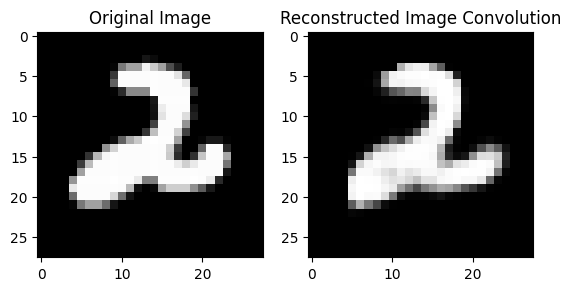

In [88]:
decoded_exampleC = decoderC.predict(np.array([exampleC])).reshape(28, 28)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(X_test[index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image Convolution')
plt.imshow(decoded_exampleC, cmap='gray')
plt.show()